In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the datasets

pd.read_csv("dailyActivity_merged.csv")
pd.read_csv("dailyCalories_merged.csv")
pd.read_csv("dailySteps_merged.csv")
pd.read_csv("sleepDay_merged.csv")
pd.read_csv("weightLogInfo_merged.csv")

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [4]:
daily_activity_data = pd.read_csv("dailyActivity_merged.csv")
daily_calories_data = pd.read_csv("dailyCalories_merged.csv")
daily_steps_data = pd.read_csv("dailySteps_merged.csv")
sleep_day_data = pd.read_csv("sleepDay_merged.csv")
weight_log_data = pd.read_csv("weightLogInfo_merged.csv")

In [6]:
daily_activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
daily_calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [8]:
daily_steps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [9]:
sleep_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [10]:
weight_log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [12]:
# cleaning the dataset

missing_values = {
    "daily_activity_data": daily_activity_data.isnull().sum(),
    "daily_calories_data": daily_calories_data.isnull().sum(),
    "daily_steps_data": daily_steps_data.isnull().sum(),
    "sleep_day_data": sleep_day_data.isnull().sum(),
    "weight_log_data": weight_log_data.isnull().sum()
}

missing_values_df = pd.DataFrame(missing_values)
missing_values_df

,daily_activity_data,daily_calories_data,daily_steps_data,sleep_day_data,weight_log_data
ActivityDate,0.0,NaN,NaN,NaN,NaN
ActivityDay,NaN,0.0,0.0,NaN,NaN
BMI,NaN,NaN,NaN,NaN,0.0
Calories,0.0,0.0,NaN,NaN,NaN
Date,NaN,NaN,NaN,NaN,0.0
FairlyActiveMinutes,0.0,NaN,NaN,NaN,NaN
Fat,NaN,NaN,NaN,NaN,65.0
Id,0.0,0.0,0.0,0.0,0.0
IsManualReport,NaN,NaN,NaN,NaN,0.0
LightActiveDistance,0.0,NaN,NaN,NaN,NaN


In [13]:
# Drop rows with missing values in the "Fat" column of the "Weight_log_data" table
weight_log_data.dropna(subset=['Fat'], inplace=True)


In [14]:
# Checking for duplicate records in each dataset
duplicate_counts = {
    "daily_activity_data": daily_activity_data.duplicated().sum(),
    "daily_calories_data": daily_calories_data.duplicated().sum(),
    "daily_steps_data": daily_steps_data.duplicated().sum(),
    "sleep_day_data": sleep_day_data.duplicated().sum(),
    "weight_log_data": weight_log_data.duplicated().sum()
}

duplicate_counts_df = pd.DataFrame(duplicate_counts, index=["Duplicates"])
duplicate_counts_df

,daily_activity_data,daily_calories_data,daily_steps_data,sleep_day_data,weight_log_data
Duplicates,0,0,0,3,0


In [15]:
#removing the duplicate records in the "sleep_data_data", as shown above

sleep_day_data_dupremoved = sleep_day_data.drop_duplicates()
sleep_day_data_dupremoved

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [16]:
# Standardize date columns across datasets so that they can be merged

daily_activity_data.loc[:, 'ActivityDate'] = pd.to_datetime(daily_activity_data.loc[:, 'ActivityDate'])
daily_calories_data.loc[:, 'ActivityDay'] = pd.to_datetime(daily_calories_data.loc[:, 'ActivityDay'])
daily_steps_data.loc[:, 'ActivityDay'] = pd.to_datetime(daily_steps_data.loc[:, 'ActivityDay'])
sleep_day_data_dupremoved.loc[:, 'SleepDay'] = pd.to_datetime(sleep_day_data_dupremoved.loc[:, 'SleepDay'])


C:\Users\USER\AppData\Local\Temp\ipykernel_16572\1140085172.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_day_data_dupremoved.loc[:, 'SleepDay'] = pd.to_datetime(sleep_day_data_dupremoved.loc[:, 'SleepDay'])


In [17]:
#merging tables

# firstly, we merge the daily_activity_data, daily_calories_data, and daily_steps_data datasets

merged_data = pd.merge(daily_activity_data, daily_calories_data, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'])
merged_data = pd.merge(merged_data, daily_steps_data, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'])
merged_data

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories_x,ActivityDay_x,Calories_y,ActivityDay_y,StepTotal
0,1503960366,2016-04-12 00:00:00,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,2016-04-12 00:00:00,1985,2016-04-12 00:00:00,13162
1,1503960366,2016-04-13 00:00:00,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2016-04-13 00:00:00,1797,2016-04-13 00:00:00,10735
2,1503960366,2016-04-14 00:00:00,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,2016-04-14 00:00:00,1776,2016-04-14 00:00:00,10460
3,1503960366,2016-04-15 00:00:00,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,2016-04-15 00:00:00,1745,2016-04-15 00:00:00,9762
4,1503960366,2016-04-16 00:00:00,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2016-04-16 00:00:00,1863,2016-04-16 00:00:00,12669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08 00:00:00,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,2016-05-08 00:00:00,2847,2016-05-08 00:00:00,10686
936,8877689391,2016-05-09 00:00:00,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,2016-05-09 00:00:00,3710,2016-05-09 00:00:00,20226
937,8877689391,2016-05-10 00:00:00,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,2016-05-10 00:00:00,2832,2016-05-10 00:00:00,10733
938,8877689391,2016-05-11 00:00:00,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,2016-05-11 00:00:00,3832,2016-05-11 00:00:00,21420


In [18]:
#merging tables continued

#we need to check for and remove any duplicates

duplicate_counts = {"merged_data": merged_data.duplicated().sum()}
duplicate_counts_df = pd.DataFrame(duplicate_counts, index=["Duplicates"])
duplicate_counts_df

,merged_data
Duplicates,0


In [19]:
# Merging tables continued

# Now merging the Sleep Day Data with the "merged_data"
merged_data_complete = pd.merge(merged_data, sleep_day_data_dupremoved, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

# Displaying the first few rows of the final merged dataset
merged_data_complete.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories_x,ActivityDay_x,Calories_y,ActivityDay_y,StepTotal,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12 00:00:00,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,728,1985,2016-04-12 00:00:00,1985,2016-04-12 00:00:00,13162,2016-04-12 00:00:00,1.0,327.0,346.0
1,1503960366,2016-04-13 00:00:00,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,776,1797,2016-04-13 00:00:00,1797,2016-04-13 00:00:00,10735,2016-04-13 00:00:00,2.0,384.0,407.0
2,1503960366,2016-04-14 00:00:00,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,1218,1776,2016-04-14 00:00:00,1776,2016-04-14 00:00:00,10460,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15 00:00:00,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,726,1745,2016-04-15 00:00:00,1745,2016-04-15 00:00:00,9762,2016-04-15 00:00:00,1.0,412.0,442.0
4,1503960366,2016-04-16 00:00:00,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,773,1863,2016-04-16 00:00:00,1863,2016-04-16 00:00:00,12669,2016-04-16 00:00:00,2.0,340.0,367.0


In [20]:
# View the statistics of our merged dataset

df = merged_data_complete
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories_x,ActivityDay_x,Calories_y,ActivityDay_y,StepTotal,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12 00:00:00,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,...,728,1985,2016-04-12 00:00:00,1985,2016-04-12 00:00:00,13162,2016-04-12 00:00:00,1.0,327.0,346.0
1,1503960366,2016-04-13 00:00:00,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,...,776,1797,2016-04-13 00:00:00,1797,2016-04-13 00:00:00,10735,2016-04-13 00:00:00,2.0,384.0,407.0
2,1503960366,2016-04-14 00:00:00,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,...,1218,1776,2016-04-14 00:00:00,1776,2016-04-14 00:00:00,10460,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15 00:00:00,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,...,726,1745,2016-04-15 00:00:00,1745,2016-04-15 00:00:00,9762,2016-04-15 00:00:00,1.0,412.0,442.0
4,1503960366,2016-04-16 00:00:00,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,...,773,1863,2016-04-16 00:00:00,1863,2016-04-16 00:00:00,12669,2016-04-16 00:00:00,2.0,340.0,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08 00:00:00,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,1174,2847,2016-05-08 00:00:00,2847,2016-05-08 00:00:00,10686,NaN,NaN,NaN,NaN
936,8877689391,2016-05-09 00:00:00,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,1131,3710,2016-05-09 00:00:00,3710,2016-05-09 00:00:00,20226,NaN,NaN,NaN,NaN
937,8877689391,2016-05-10 00:00:00,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,1187,2832,2016-05-10 00:00:00,2832,2016-05-10 00:00:00,10733,NaN,NaN,NaN,NaN
938,8877689391,2016-05-11 00:00:00,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,1127,3832,2016-05-11 00:00:00,3832,2016-05-11 00:00:00,21420,NaN,NaN,NaN,NaN


In [22]:
# checking for all our columns

df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories_x',
       'ActivityDay_x', 'Calories_y', 'ActivityDay_y', 'StepTotal', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')

In [23]:
# There are duplicate columns i.e. 'Calories_x' and 'Calories_y'

# Drop one of the duplicate columns (e.g., calories_x)
df.drop(columns=['Calories_x'], inplace=True)

# Rename the other duplicate column (e.g., calories_y)
df.rename(columns={'Calories_y': 'Calories'}, inplace=True)

In [24]:
# there are duplicate columns for activity_day_x and activity_day_y

# Rename one of the duplicate columns
df.rename(columns={'ActivityDay_x': 'Activity_Day'}, inplace=True)

# Drop the other duplicate column
df.drop(columns=['ActivityDay_y'], inplace=True)


In [25]:
# after removing the duplicate activity and calories columns above, let us see our columns and top rows

df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Activity_Day,Calories,StepTotal,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12 00:00:00,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,2016-04-12 00:00:00,1985,13162,2016-04-12 00:00:00,1.0,327.0,346.0
1,1503960366,2016-04-13 00:00:00,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,2016-04-13 00:00:00,1797,10735,2016-04-13 00:00:00,2.0,384.0,407.0
2,1503960366,2016-04-14 00:00:00,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,11,181,1218,2016-04-14 00:00:00,1776,10460,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15 00:00:00,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,2016-04-15 00:00:00,1745,9762,2016-04-15 00:00:00,1.0,412.0,442.0
4,1503960366,2016-04-16 00:00:00,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,2016-04-16 00:00:00,1863,12669,2016-04-16 00:00:00,2.0,340.0,367.0


In [26]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,410.000000,410.000000,410.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,7637.910638,1.119512,419.173171,458.482927
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,5087.150742,0.346636,118.635918,127.455140
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,58.000000,61.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,3789.750000,1.000000,361.000000,403.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,7405.500000,1.000000,432.500000,463.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,10727.000000,1.000000,490.000000,526.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,36019.000000,3.000000,796.000000,961.000000


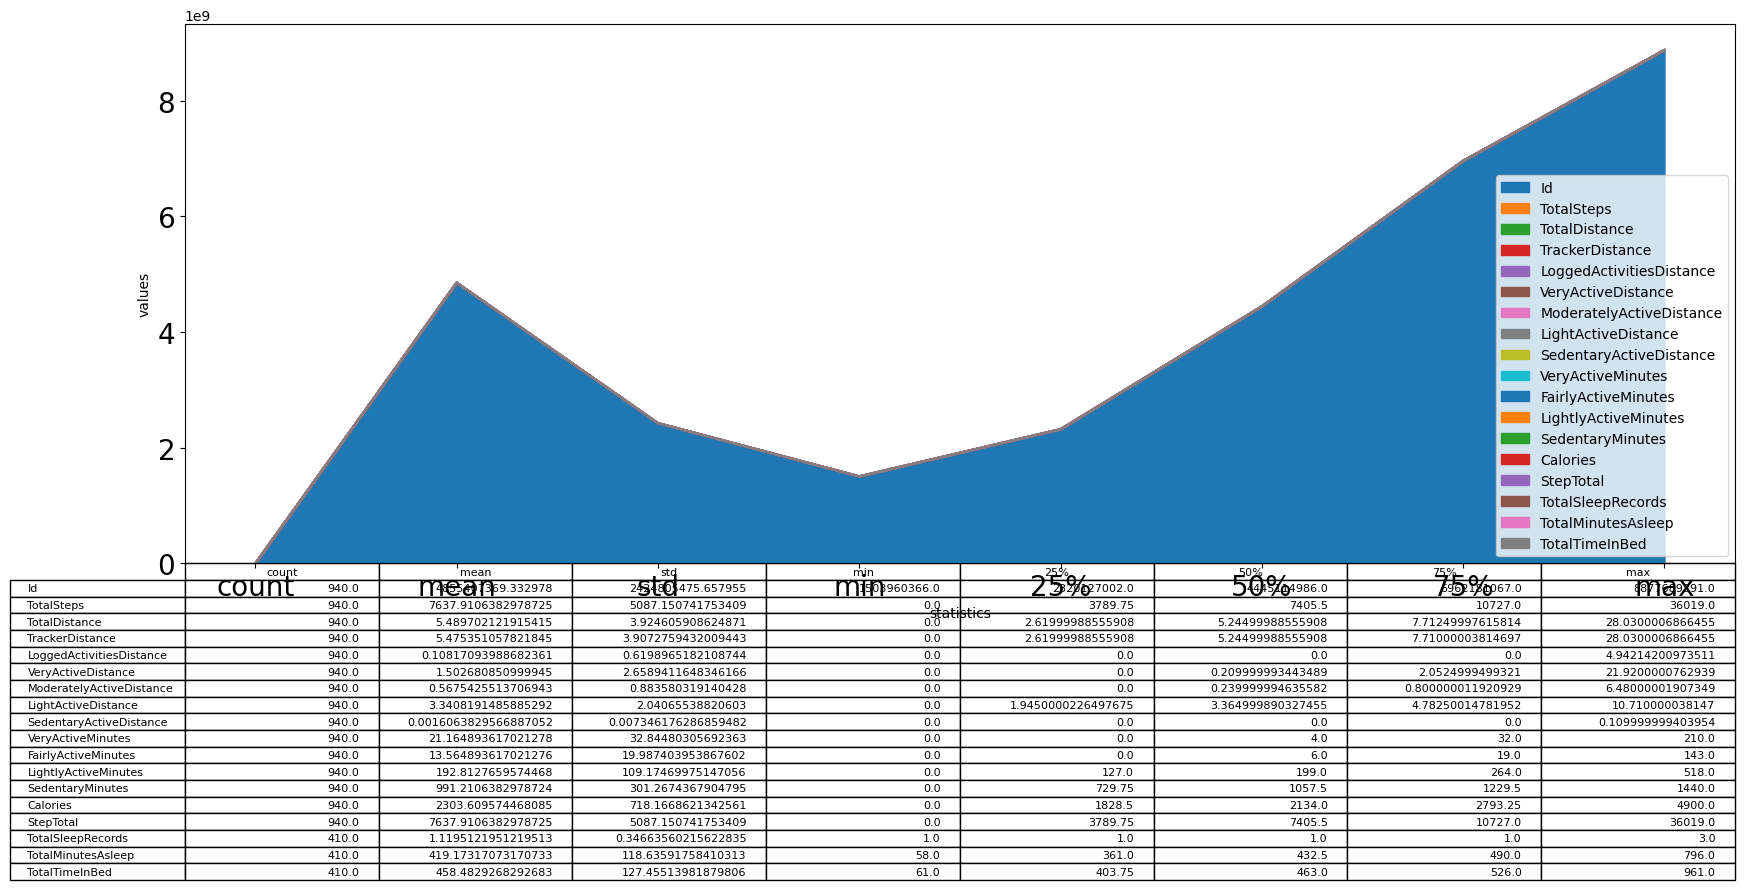

In [27]:
# Visualize the statistics of the dataset

df.describe().plot(kind='area', fontsize=20,figsize=(20,7), table=True)
plt.xlabel('statistics')
plt.ylabel('values')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16572\3019315844.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_16572\3019315844.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_16572\3019315844.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_16572\3019315844.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_16572\3019315844.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_16572\3019315844.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


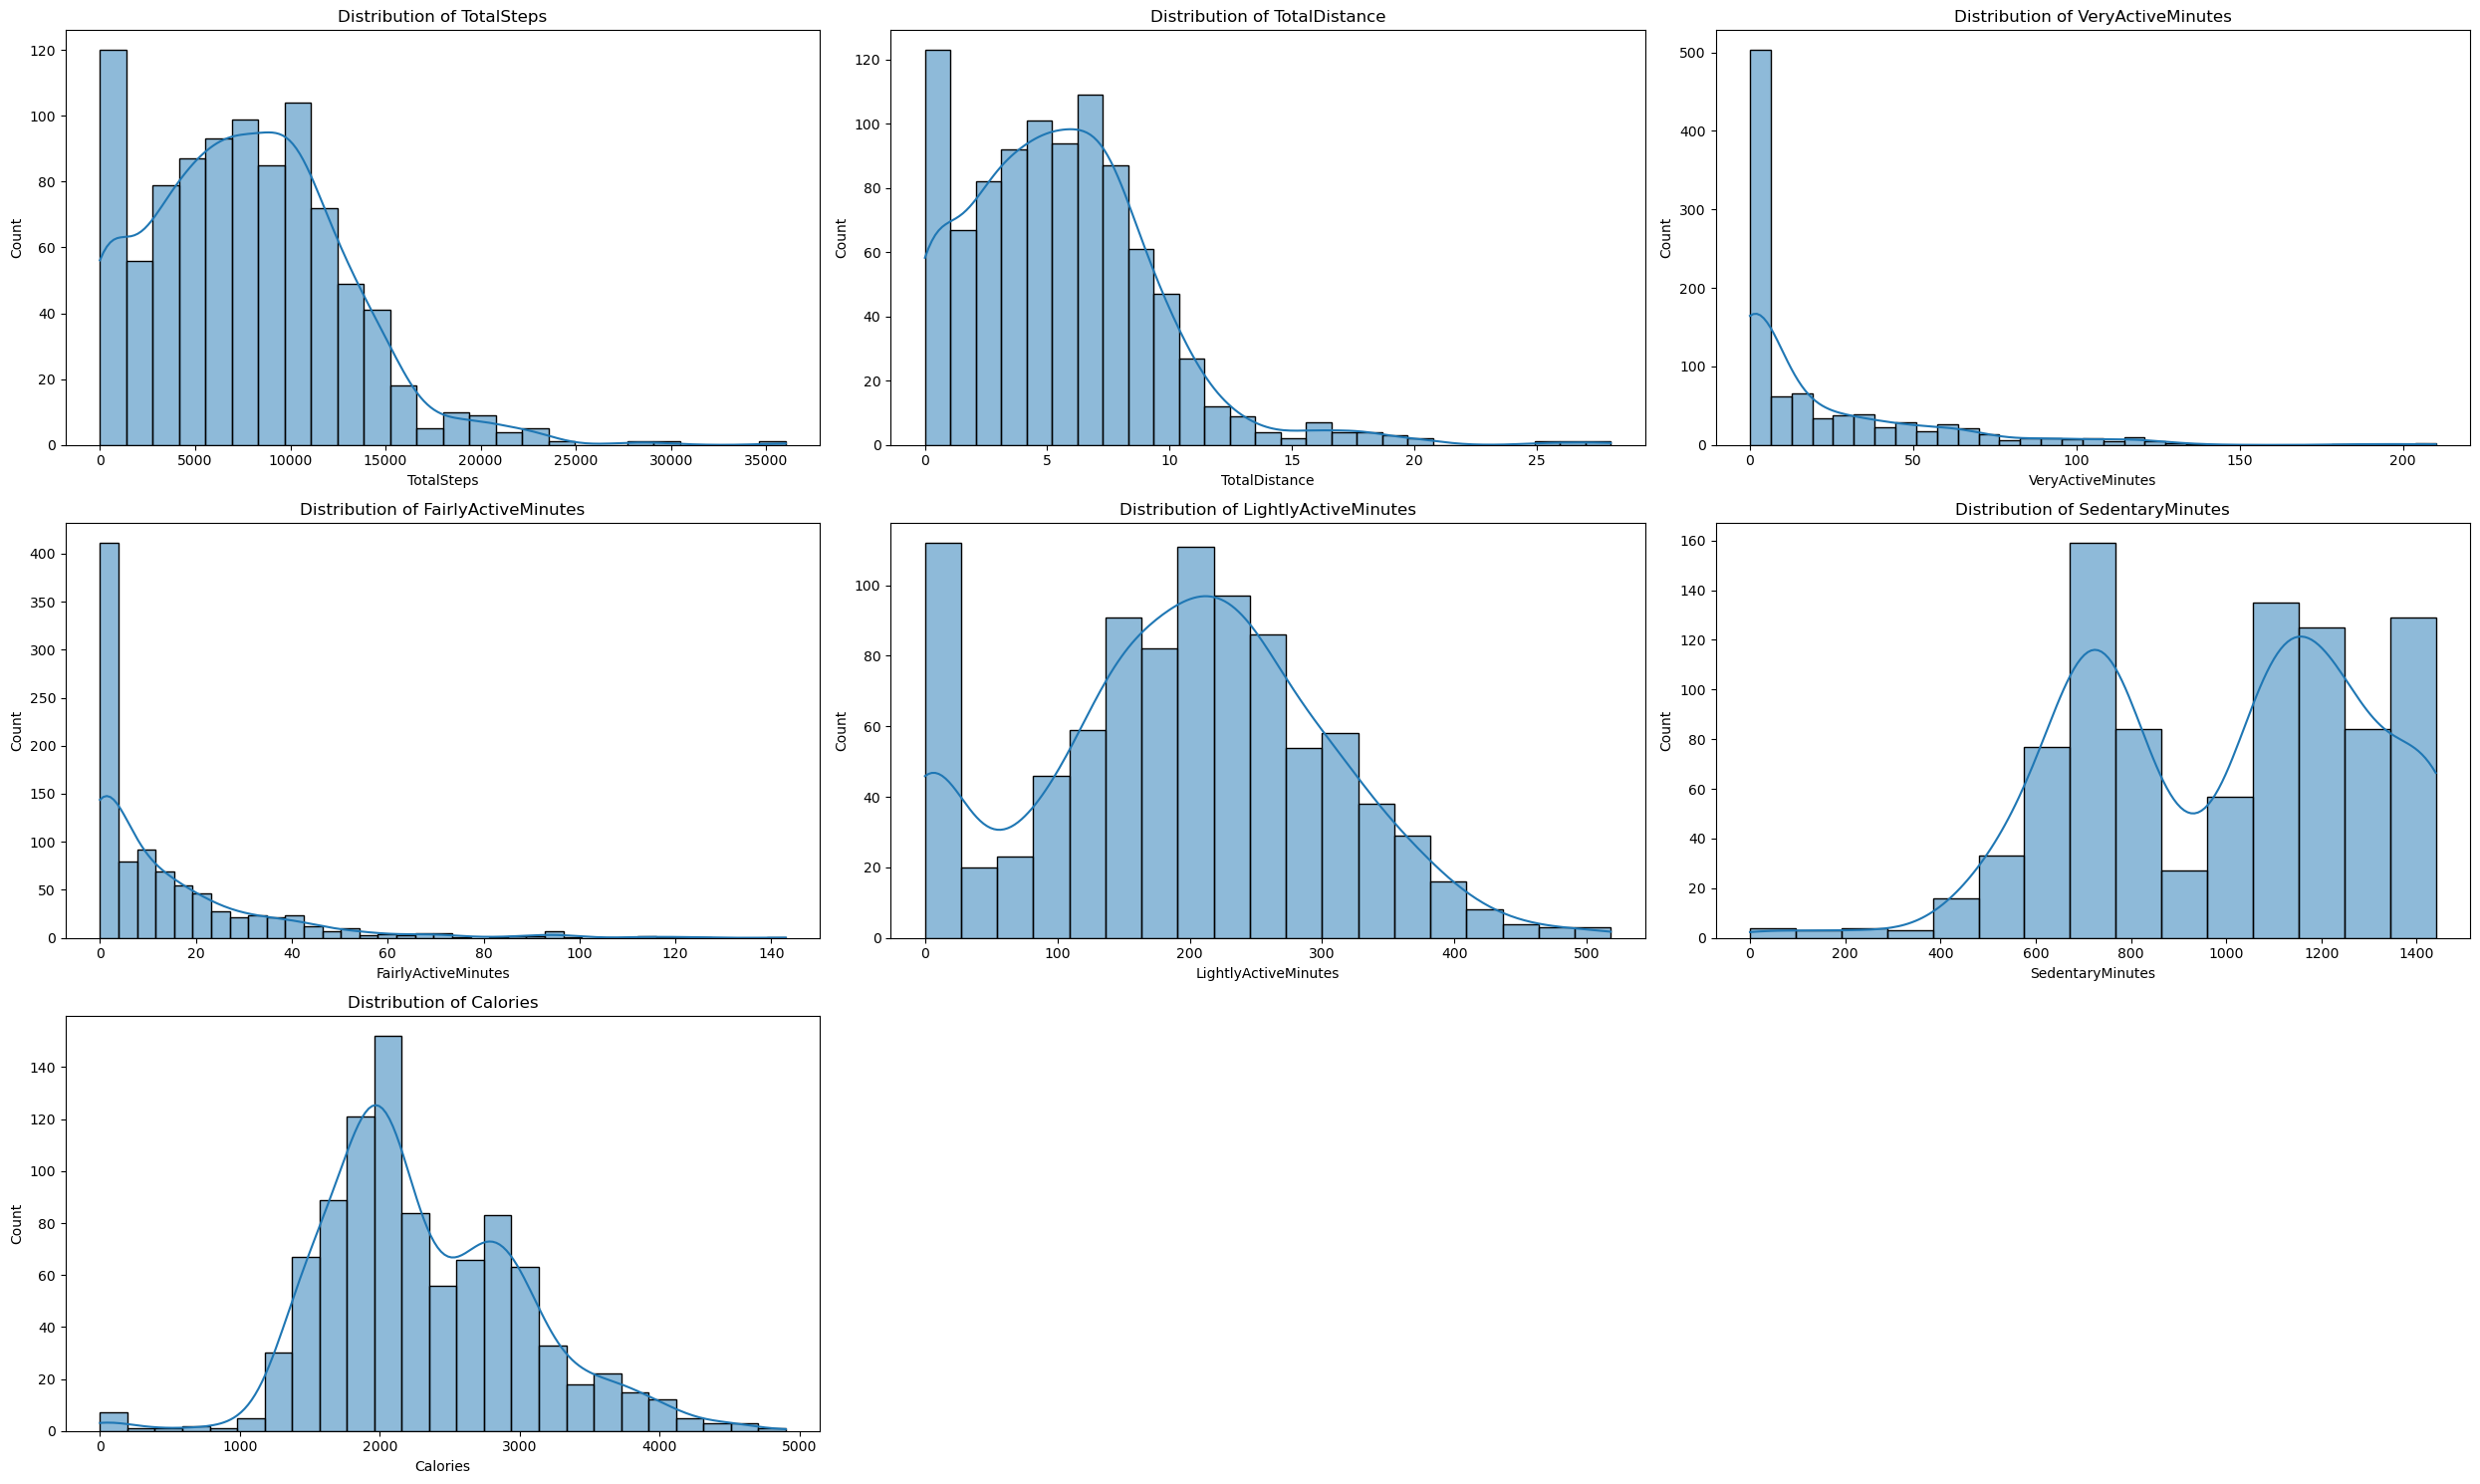

In [28]:
# Visualizing distributions of key activity metrics
plt.figure(figsize=(25, 15))

# List of columns for distribution plots
columns_to_plot = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 
                   'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

In [29]:
# check the relationship between the users activities and sleep
correlation_data = df[['TotalMinutesAsleep', 'TotalTimeInBed', 'TotalSteps', 
                                      'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 
                                      'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].corr()
correlation_data

,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalMinutesAsleep,1.000000,0.930422,-0.190344,-0.176936,-0.088127,-0.249208,0.027583,-0.601073,-0.031699
TotalTimeInBed,0.930422,1.000000,-0.166232,-0.161177,-0.109623,-0.114358,-0.028758,-0.620280,-0.134805
TotalSteps,-0.190344,-0.166232,1.000000,0.985369,0.667079,0.498693,0.569600,-0.327484,0.591568
TotalDistance,-0.176936,-0.161177,0.985369,1.000000,0.681297,0.462899,0.516300,-0.288094,0.644962
VeryActiveMinutes,-0.088127,-0.109623,0.667079,0.681297,1.000000,0.312420,0.051926,-0.164671,0.615838
FairlyActiveMinutes,-0.249208,-0.114358,0.498693,0.462899,0.312420,1.000000,0.148820,-0.237446,0.297623
LightlyActiveMinutes,0.027583,-0.028758,0.569600,0.516300,0.051926,0.148820,1.000000,-0.437104,0.286718
SedentaryMinutes,-0.601073,-0.620280,-0.327484,-0.288094,-0.164671,-0.237446,-0.437104,1.000000,-0.106973
Calories,-0.031699,-0.134805,0.591568,0.644962,0.615838,0.297623,0.286718,-0.106973,1.000000


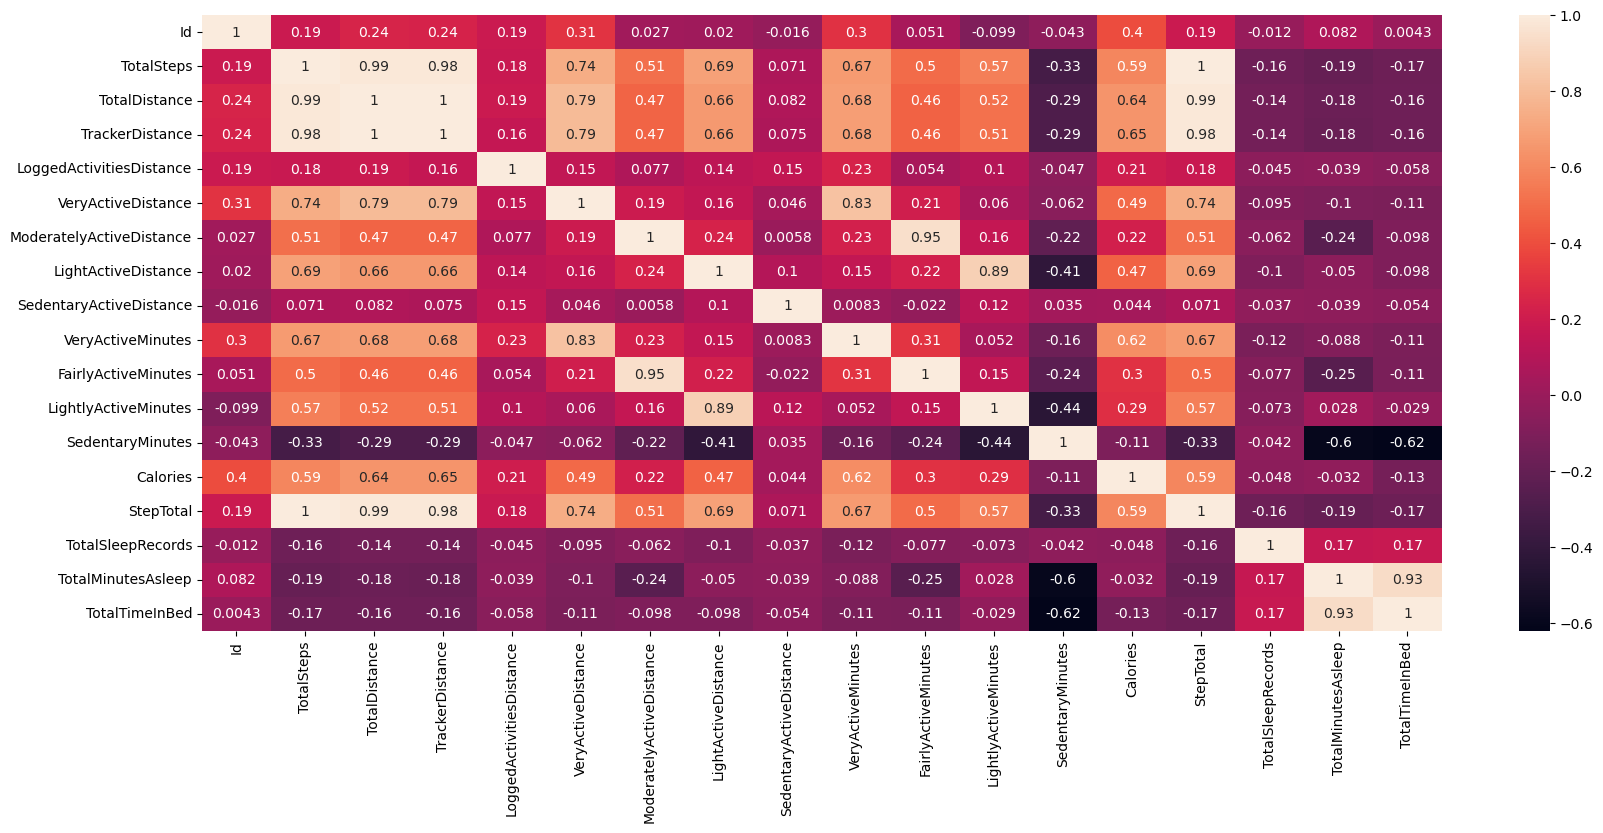

In [31]:
# use a heatmap to visualize the above correlation

numeric_columns = df.select_dtypes(include=['float'])
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.rcParams['figure.figsize'] = (25, 8)
plt.show()

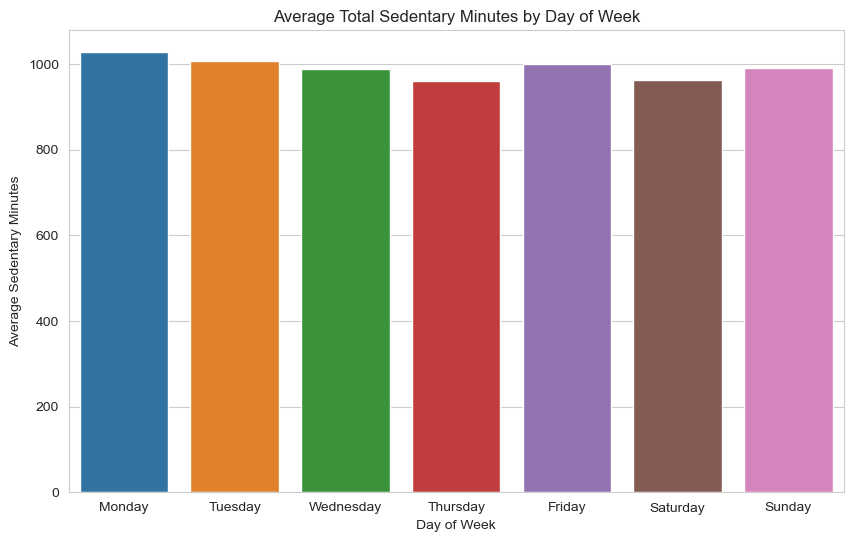

In [42]:
# Calculating and visualizing the Average Total Sedentary Minutes by Day of The Week

# Convert 'ActivityDate' to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Extract the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['DayOfWeek'] = df['ActivityDate'].dt.dayofweek

# Group by the day of the week and calculate the average sedentary minutes
average_sedentary_minutes = df.groupby('DayOfWeek')['SedentaryMinutes'].mean().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='SedentaryMinutes', data=average_sedentary_minutes)

# Set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Sedentary Minutes')
plt.title('Average Total Sedentary Minutes by Day of The Week')

# Set x-tick labels to be more meaningful
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Show the plot
plt.show()


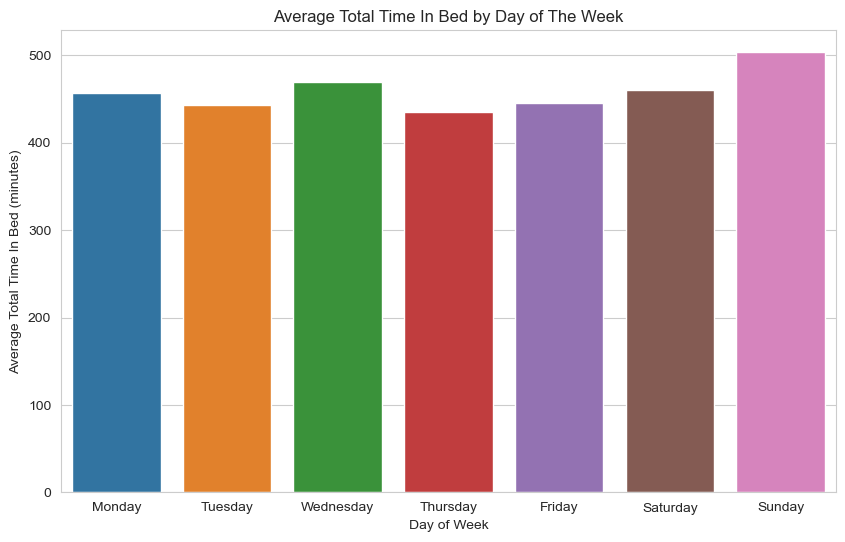

In [48]:
# Calculating and Visualizing Average Total Time in Bed by Day of the week

# Convert 'SleepDay' to datetime format
df['SleepDay'] = pd.to_datetime(df['SleepDay'])

# Extract the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['DayOfWeek'] = df['SleepDay'].dt.dayofweek

# Group by the day of the week and calculate the average total time in bed
average_total_in_bed = df.groupby('DayOfWeek')['TotalTimeInBed'].mean().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='TotalTimeInBed', data=average_total_in_bed)

# Set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Total Time In Bed (minutes)')
plt.title('Average Total Time In Bed by Day of The Week')

# Set x-tick labels to be more meaningful
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Show the plot
plt.show()


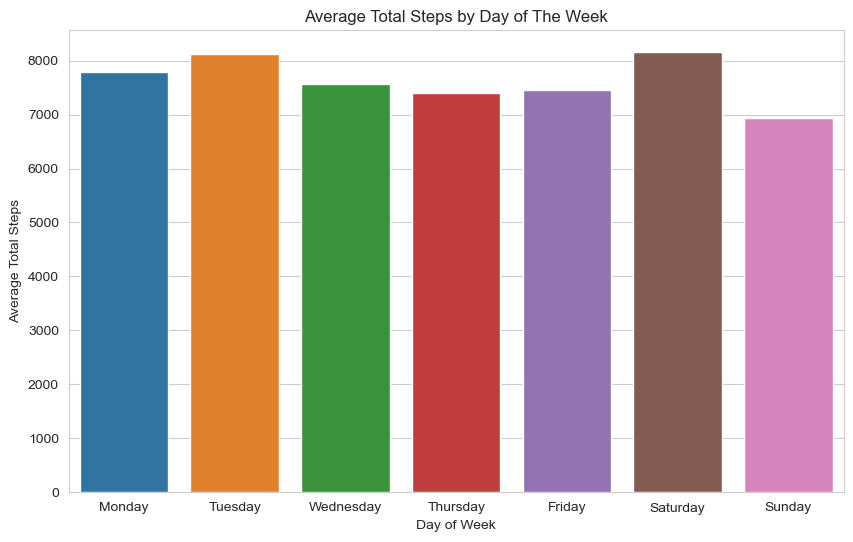

In [49]:
# Calculating and Visualizing Average Total Steps by Day of the week

# Convert 'ActivityDate' to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Extract the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['DayOfWeek'] = df['ActivityDate'].dt.dayofweek

# Group by the day of the week and calculate the average total steps
average_total_steps = df.groupby('DayOfWeek')['TotalSteps'].mean().reset_index()

# Set the style of the plot
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='TotalSteps', data=average_total_steps)

# Set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Total Steps')
plt.title('Average Total Steps by Day of The Week')

# Set x-tick labels to be more meaningful
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Show the plot
plt.show()
